In [1]:
#%% Importar librerias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [2]:
df_titanic = pd.read_csv('Titanic.csv')

df_titanic = df_titanic.drop(columns = 'PassengerId')

print(f"Las columnas son {df_titanic.columns}")
print(f"Las forma es {df_titanic.shape}")
print(f"Los datos faltantes son {df_titanic.isnull().sum()}")

Las columnas son Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Las forma es (891, 11)
Los datos faltantes son Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


# Tratamiento de datos

Los datos faltantes son 

Age         177

Cabin       687

Embarked      2


Age

In [3]:
# Primero, verifica los valores únicos en 'Age'
print("Valores únicos en 'Age':")
print(df_titanic['Age'].unique())

# Convierte a numérico, reemplazando errores con NaN
df_titanic['Age'] = pd.to_numeric(df_titanic['Age'], errors='coerce')

# Reemplaza los valores de edad 0 por NaN
df_titanic['Age'] = df_titanic['Age'].replace(0, np.nan)

# Verifica la cantidad de valores NaN
print(f"Valores NaN después de reemplazar 0: {df_titanic['Age'].isna().sum()}")

# Calcular la media excluyendo los NaN
mean_Age = df_titanic['Age'].mean()
print(f"Media de la columna 'Age': {mean_Age}")

# Llenar los valores NaN con la media calculada
df_titanic['Age'] = df_titanic['Age'].fillna(mean_Age)

# Convertir a tipo int64
df_titanic['Age'] = df_titanic['Age'].astype(np.int64)


Valores únicos en 'Age':
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Valores NaN después de reemplazar 0: 177
Media de la columna 'Age': 29.69911764705882


SibSp

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    3
8    0
9    1
Name: SibSp, dtype: int64
int64


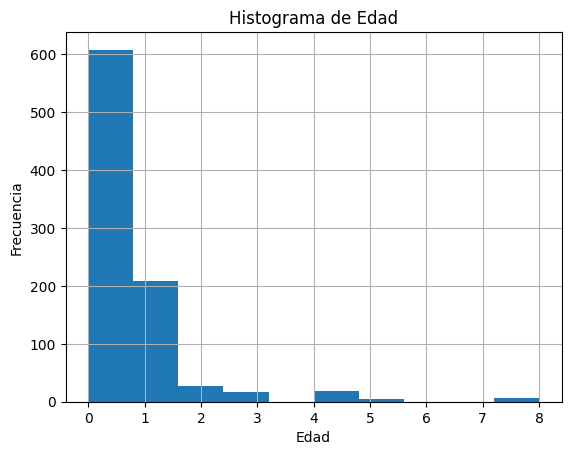

In [4]:
#SibSp
print(df_titanic['SibSp'].head(10))
print(df_titanic['SibSp'].dtype)

df_titanic['SibSp'].hist(bins=10)
plt.xlabel('Acompañantes')
plt.ylabel('Frecuencia')
plt.title('Histograma de SibSp')
plt.show()

Variables Name y Ticket

In [5]:
# Mostrar los valores de las columnas 'Name' y 'Ticket'
names_and_tickets = df_titanic[['Name', 'Ticket']]
print(names_and_tickets)

# Eliminar columnas no útiles para el análisis
df_titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)


                                                  Name            Ticket
0                              Braund, Mr. Owen Harris         A/5 21171
1    Cumings, Mrs. John Bradley (Florence Briggs Th...          PC 17599
2                               Heikkinen, Miss. Laina  STON/O2. 3101282
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)            113803
4                             Allen, Mr. William Henry            373450
..                                                 ...               ...
886                              Montvila, Rev. Juozas            211536
887                       Graham, Miss. Margaret Edith            112053
888           Johnston, Miss. Catherine Helen "Carrie"        W./C. 6607
889                              Behr, Mr. Karl Howell            111369
890                                Dooley, Mr. Patrick            370376

[891 rows x 2 columns]


Variable Embarked

In [6]:
embarked = df_titanic["Embarked"]
print(embarked)

# Convertir variable categorica a numerica
label_encoder_embarked = LabelEncoder()


# Codificar columna 'Embarked', llenando valores faltantes con el valor más frecuente
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)
df_titanic['Embarked'] = label_encoder_embarked.fit_transform(df_titanic['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


Variable Sex

In [7]:
# Convertir variable categórica a numérica
label_encoder_sex = LabelEncoder()

# Codificar columna 'Sex'
df_titanic['Sex'] = label_encoder_sex.fit_transform(df_titanic['Sex'])




Variable Fare

In [8]:
# Mostrar los valores de la columna 'Fare'
fare = df_titanic['Fare']
print(fare)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


# Analisis de componentes